PROBLEM: You're a digital marketer who sent out 2,000 promotional emails, and 180 recipients opened the email. You want to estimate the true open rate using Bayesian inference.

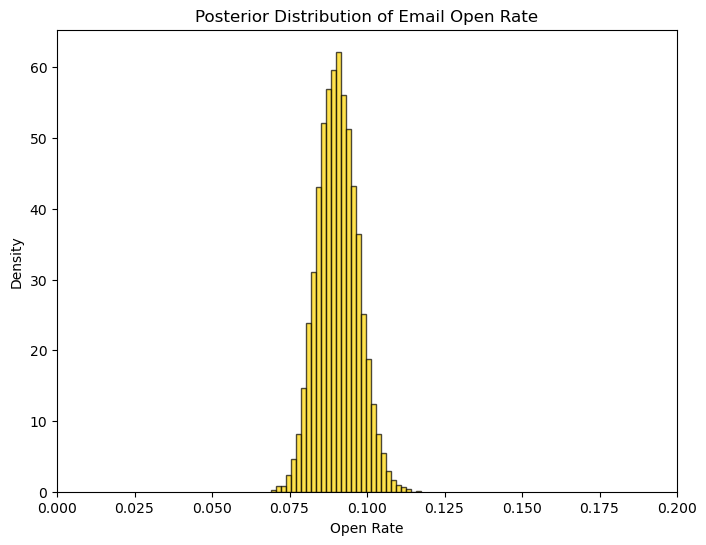


📊 Email Open Rate Estimate (Bayesian Inference)
• Mean open rate: 0.0904
• Mode open rate: 0.0900

📌 CONCLUSION:
The estimated average open rate is approximately 9.04%, indicating that about 9 out of every 100 emails are opened. This provides a useful benchmark for evaluating future email campaigns and optimizing engagement strategies.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
total_emails_sent = 2000      
num_opens = 180               

# Prior hyperparameters for the Beta distribution
prior_alpha = 1  
prior_beta = 1

# Update the prior with observed data
posterior_alpha = prior_alpha + num_opens
posterior_beta = prior_beta + (total_emails_sent - num_opens)

# Generate samples from the posterior distribution
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# Plot the posterior distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='gold', edgecolor='black', alpha=0.7)
plt.title('Posterior Distribution of Email Open Rate')
plt.xlabel('Open Rate')
plt.ylabel('Density')
plt.xlim(0, 0.2)  # Zoom in around plausible open rate values
plt.show()

# Calculate summary statistics
mean_open_rate = posterior_alpha / (posterior_alpha + posterior_beta)
mode_open_rate = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)

# Nicely formatted output
print("\n\033[1m📊 Email Open Rate Estimate (Bayesian Inference)\033[0m")
print(f"• Mean open rate: \033[94m{mean_open_rate:.4f}\033[0m")
print(f"• Mode open rate: \033[94m{mode_open_rate:.4f}\033[0m")

# Bold conclusion
print("\n\033[1m📌 CONCLUSION:\033[0m")
print("\033[1mThe estimated average open rate is approximately {:.2f}%, indicating that about 9 out of every 100 emails are opened. "
      "This provides a useful benchmark for evaluating future email campaigns and optimizing engagement strategies.\033[0m"
      .format(mean_open_rate * 100))


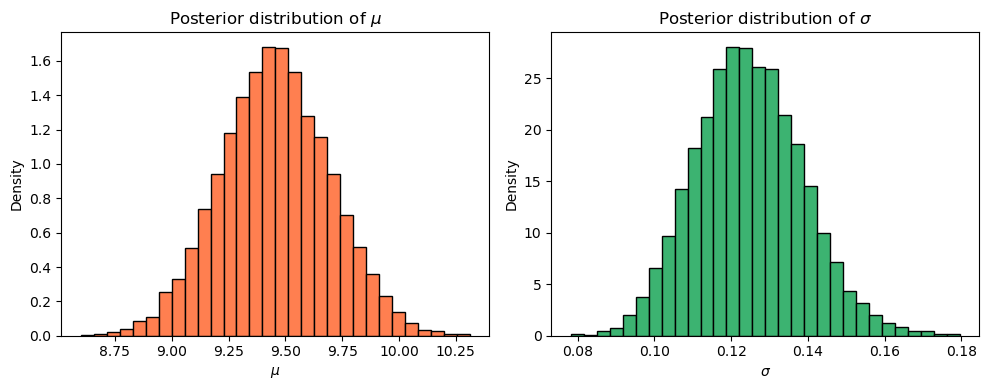


📊 Posterior Summary Statistics (Bayesian Inference)
• Mean of μ: 9.4549
• Standard deviation of μ: 0.2417
• Mean of σ: 0.1246
• Standard deviation of σ: 0.0141


In [45]:
#IMPLEMENTING BAYESIAN INFERENCE IN PYTHON

import numpy as np
import matplotlib.pyplot as plt

# Generate new synthetic data
np.random.seed(2025)
true_mu = 10      
true_sigma = 3    
data = np.random.normal(true_mu, true_sigma, size=150) 

# Define the prior hyperparameters
prior_mu_mean = 2
prior_mu_precision = 0.5  # Lower precision (larger variance)
prior_sigma_alpha = 3
prior_sigma_beta = 1.5

# Update the prior hyperparameters with the data
posterior_mu_precision = prior_mu_precision + len(data) / true_sigma**2
posterior_mu_mean = (prior_mu_precision * prior_mu_mean + np.sum(data) / true_sigma**2) / posterior_mu_precision

posterior_sigma_alpha = prior_sigma_alpha + len(data) / 2
posterior_sigma_beta = prior_sigma_beta + np.sum((data - np.mean(data))**2) / 2

# Calculate the posterior parameters
posterior_mu = np.random.normal(posterior_mu_mean, 1 / np.sqrt(posterior_mu_precision), size=10000)
posterior_sigma = np.random.gamma(posterior_sigma_alpha, 1 / posterior_sigma_beta, size=10000)

# Plot the posterior distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(posterior_mu, bins=30, density=True, color='coral', edgecolor='black')
plt.title(r'Posterior distribution of $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(posterior_sigma, bins=30, density=True, color='mediumseagreen', edgecolor='black')
plt.title(r'Posterior distribution of $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate summary statistics
mean_mu = np.mean(posterior_mu)
std_mu = np.std(posterior_mu)

mean_sigma = np.mean(posterior_sigma)
std_sigma = np.std(posterior_sigma)

# Nicely formatted output
print("\n\033[1m📊 Posterior Summary Statistics (Bayesian Inference)\033[0m")
print(f"• Mean of μ: \033[94m{mean_mu:.4f}\033[0m")
print(f"• Standard deviation of μ: \033[94m{std_mu:.4f}\033[0m")
print(f"• Mean of σ: \033[92m{mean_sigma:.4f}\033[0m")
print(f"• Standard deviation of σ: \033[92m{std_sigma:.4f}\033[0m")
